# Project: How has the movie industry change in time?

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The database used corresponds to the TMDB 5000 Movie Dataset. The database has 10866 observations and 21 variables related to movies:
-id
-original_title
-genres
-release_date
-popularity
-director
-budget_adj (budget in terms of 2010 dollars)
-revenue_adj (revenue in terms of 2010 dollars)

In this reportI will explore the following questions: 
- Between 1960 and 2020 has there been any changes related to runtime, popularity, budget and revenue?
- How many directors per movie there are?

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
% matplotlib inline

df = pd.read_csv('tmdb-movies.csv')

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [40]:
df = pd.read_csv('tmdb-movies.csv')
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [41]:
df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [42]:
print(df.shape)


(10866, 21)


In [43]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
print(df.dtypes)
print(df.nunique())

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object
id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords      

### Data Cleaning (Replace this with more specific notes!)

In [44]:
null= df.isnull().sum()
print(null)


id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


The columns that have most null values are homepage, tagline, keywords, production_companies, cast, genres and overview. But since non of these will be used to do the analysis, those variables will be deleted.  

In [45]:
df.drop(['homepage', 'tagline', 'keywords','cast','production_companies', 'overview', 'genres', 'imdb_id', 'vote_count', 'vote_average'], axis=1, inplace=True )

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
id                10866 non-null int64
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
director          10822 non-null object
runtime           10866 non-null int64
release_date      10866 non-null object
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(3), int64(5), object(3)
memory usage: 933.9+ KB


In [91]:
null= df.isnull().sum()
print(null)

id                 0
popularity         0
budget             0
revenue            0
original_title     0
director          44
runtime            0
release_date       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64


Now director is the only variable that has nan values. 

Since there are only 23 i will drop theese values.

In [94]:
df.dropna(inplace=True)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10822 entries, 0 to 10865
Data columns (total 11 columns):
id                10822 non-null int64
popularity        10822 non-null float64
budget            10822 non-null int64
revenue           10822 non-null int64
original_title    10822 non-null object
director          10822 non-null object
runtime           10822 non-null int64
release_date      10822 non-null object
release_year      10822 non-null int64
budget_adj        10822 non-null float64
revenue_adj       10822 non-null float64
dtypes: float64(3), int64(5), object(3)
memory usage: 1014.6+ KB


Now the data has no missing values and it's ready to explore them.

<a id='eda'></a>
## Exploratory Data Analysis

<h4>Correlation Matrix</h4>

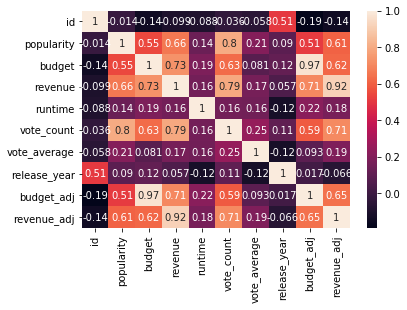

In [86]:
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [87]:
corrMatrix>0.6

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,True,False,False,False,False,False,False,False,False,False
popularity,False,True,False,True,False,True,False,False,False,True
budget,False,False,True,True,False,True,False,False,True,True
revenue,False,True,True,True,False,True,False,False,True,True
runtime,False,False,False,False,True,False,False,False,False,False
vote_count,False,True,True,True,False,True,False,False,False,True
vote_average,False,False,False,False,False,False,True,False,False,False
release_year,False,False,False,False,False,False,False,True,False,False
budget_adj,False,False,True,True,False,False,False,False,True,True
revenue_adj,False,True,True,True,False,True,False,False,True,True


Most correlated variables are :
- budget and revenue
- popularity and revenue

<h3>Are movies more popular nowadays? </h3>

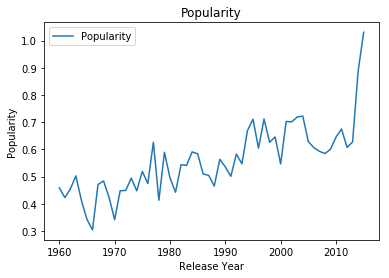

In [22]:
years = df.groupby(df.release_year).mean()
years.popularity.plot(kind='line', label='Popularity')
plt.legend()
plt.xlabel('Release Year')
plt.ylabel('Popularity')
plt.title('Popularity');

This line graph shows the popularity in time. Popularity in mean has increased by 0.6 points aproximately.

In [7]:
decades = df.groupby((df.release_year//10)*10).sum()

<h3>Has the Runtime change in time?</h3>

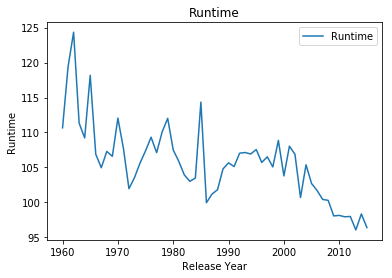

In [14]:
df.groupby('release_year').runtime.mean().plot(kind='line', label= 'Runtime')
plt.legend()
plt.xlabel('Release Year')
plt.ylabel('Runtime')
plt.title('Runtime');

This line graph shows the runtime by release year. Runtime in mean has decreased by 15 minutes aproximately.

<h3> Is there more budget and revenue nowadays? </h3>

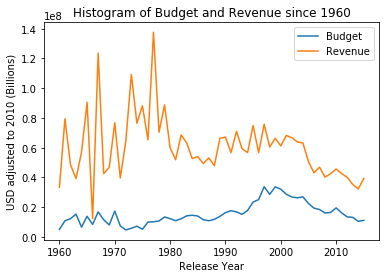

In [99]:
df.groupby('release_year').budget_adj.mean().plot(kind='line', label='Budget')
df.groupby('release_year').revenue_adj.mean().plot(kind='line', label= 'Revenue')
plt.legend()
plt.xlabel('Release Year')
plt.ylabel('USD adjusted to 2010 (Billions)')
plt.title('Histogram of Budget and Revenue since 1960');

This line graph shows the budget and revenue in time (both adjusted to 2010 money). The mean budget has stayed similar, increasing a little. The mean revenue has decreased by half aproximetly. 

<h3>How many movies are there per director?</h3>

In [46]:
def uniqueValues(director):
    unVal=set()
    for direct in director:
        unVal.add(direct)
    
    return unVal

In [47]:
direc= len((uniqueValues(df.director)))

In [49]:
movies/direc

2.144041041831097

There are 2.1 movies per director

<a id='conclusions'></a>
## Conclusions

In this data exploration I used the TMBD Movies data set, which include only hollywood and western movies. 
With this dataset I tried to analyse how runtime, budget & revenue has changed in time and how many directors there are. 
Conclusions: 
    - Runtime: over the decades the runtime in mean has decreased by 15 mins aprox. This change is not enough to say there is a correlation between time and runtime. 
    -Popularity: Popularity in mean has increased by 0.6 points aproximately.There is a correlation between popularity and release year. 
    -Budget:  The mean budget has stayed similar, increasing a little. No clear correlation.
    -Revenue: The mean revenue has decreased by almost a half. There is clear correlation between Revenue and release year.

<h3>Limitations</h3>

I used TMBD Movies dataset for the analysis and worked with popularity, revenue, budget, directors and runtime.The analysis is limited because I only used the provided dataset. For example, the dataset does not confirm that every movie released is listed.
There is no normalization or exchange rate or currency conversion is considered during this analysis and our analysis is limited to the numerical values of revenue.
Dropping missing or Null values from variables of our interest might skew our analysis and could show unintentional bias towards the relationship being analyzed. etc.
There were many values 0 in budget and revenue that were considered.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [51]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0